# IS318 - Machine Learning

## TP1 - Linear regression

The goal of this TP is to experiment with linear regression and polynomial linear regression.

First, we will work **without** the use of external libraries (such as `scikit-learn`).

In [37]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Dataset

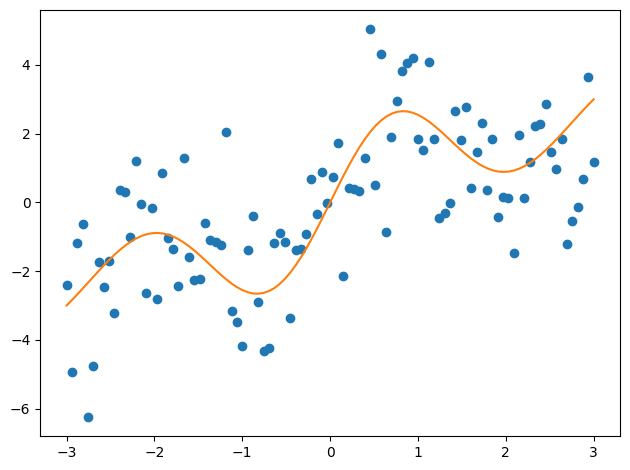

In [38]:
# Let us generate data points from a relatively complicated function
N = 100
alpha, sigma = 2., 3.
X = np.linspace(-3, 3, num=N)
y = X + (alpha * np.sin((2. * np.pi * X) / sigma) * np.exp(-(X ** 2) / (sigma ** 2)))
# Add some random noise
rng = np.random.default_rng(42)
y_noisy = y + rng.standard_normal(N) * 2.
# Show the data points
plt.plot(X, y_noisy, 'o')
plt.plot(X, y)
plt.tight_layout()

**(Question)** Shuffle and split the dataset into training (75%) and validation (25%) sets. Store the results into variables `X_train`, `y_train`, `X_valid`, `y_valid`.

*Hint:* you can use `rng.permutation` to generate a random permutation of the points.

In [39]:
# YOUR CODE HERE

rng = np.random.default_rng()
indexes = [ i for i in range(len(X)) ]
p_indexes = rng.permutation(indexes)

X_p = X[p_indexes]
y_p = y_noisy[p_indexes]

n = len(X_p)
i_75 = int(0.75*n)


X_train = X_p[:i_75]
y_train = y_p[:i_75]

X_valid = X_p[i_75:]
y_valid = y_p[i_75:]

In [40]:
assert X_train.shape == (75,)
assert y_train.shape == (75,)
assert X_valid.shape == (25,)
assert y_valid.shape == (25,)
assert np.any(X_valid != X[75:]) # points should be shuffled

### 2. Linear regression in 1D

Recall the 1D linear regression model, where we search for parameters $w_0, w_1$ that will satisfy $y_i = w_0 + w_1 x_i$ (for all $i$ in the training set).

To simplify calculations, we usually set $\textbf{w} = [w_0, w_1]^T$ and $\textbf{x}_i = [1, x_i]^T$.

Then we have $y_i = \textbf{w}^T \textbf{x}_i $.

**(Question)** Add a column with ones to the points in `X_train` and `X_valid`. Store the result in new variables `X_train_ones` and `X_valid_ones`:

In [41]:
# YOUR CODE HERE

X_train_ones = np.column_stack((np.ones(len(X_train)),X_train))
X_valid_ones = np.column_stack((np.ones(len(X_valid)),X_valid))



**(Question)** Use normal equations to find the parameters that minimize the mean squared error on the training set.

In [42]:
# YOUR CODE HERE
XTX = np.dot(np.transpose(X_train_ones), X_train_ones)
XTX_1 = np.linalg.inv(XTX)
XTX_1XT = XTX_1 @ np.transpose(X_train_ones)
w = np.dot(XTX_1XT, y_train)

print(w)


[-0.17096713  0.7341025 ]


In [43]:
assert w.shape == (2,)

**(Question)** Plot the fitted line on top of the data points. Explain the result. (complete the code and answer in the cell below)

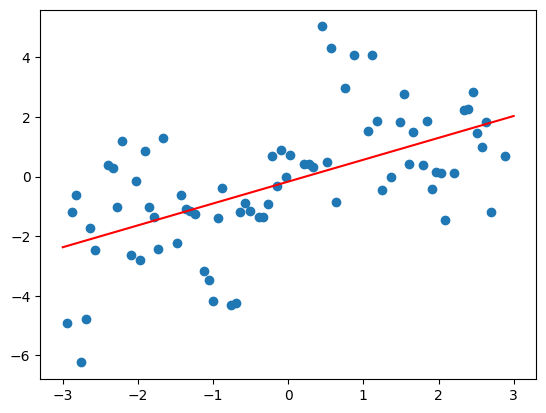

In [44]:
# YOUR CODE HERE
fitted_x = np.linspace(-3,3,100)
fitted_y = [w[0]+w[1]*x for x in fitted_x]

plt.plot(fitted_x, fitted_y, c='red')
plt.scatter(X_train, y_train)
plt.show()

YOUR ANSWER HERE

**(Question)** Plot the loss function landscape. What can you conclude from this visualization? (complete the code and answer in the cell below)

*Hint: the loss landscape can be represented by a 2D map (for example of size 100x100) where in each coordinate $(w_0, w_1)$ the value is mean squared error for these parameters. You can use `plt.contourf` to visualize the result.*

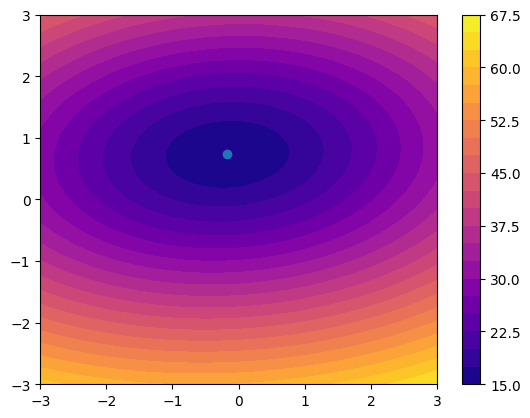

In [45]:
# YOUR CODE HERE

def Cost_for_contourf(w0, w1, X, y):
    W = np.row_stack((w0, w1))
    X = np.column_stack((np.ones(len(X)),X))
    y_hat = np.dot(X, W)
    y_hat_columns = [y_hat[:,i] for i in range(y_hat.shape[1])]
    cost = [np.linalg.norm(y_hat_i-y) for y_hat_i in y_hat_columns]
    return cost

w0 = np.linspace(-3, 3, 100)
w1 = np.linspace(-3, 3, 100)

W0, W1 = np.meshgrid(w0, w1)

initial_shape = W0.shape


W0 = W0.ravel()
W1 = W1.ravel()
Z = np.array(Cost_for_contourf(W0, W1, X_train, y_train))

W0 = W0.reshape(initial_shape)
W1 = W1.reshape(initial_shape)
Z = Z.reshape(initial_shape)


plt.contourf(W0, W1, Z, 20, cmap='plasma')
plt.plot([w[0]],[w[1]],'o')
plt.colorbar()

YOUR ANSWER HERE

### 3. Polynomial linear regression

We move on the polynomial linear regression model with degree $D$, where the relationship between $y_i$ and $x_i$ is
$ y_i = w_0 + w_1x_i + w_2x_i^2 + \ldots + w_D x_i^D $

With $\textbf{w} = [w_0, \ldots, w_D]^T$ and $\textbf{x}_i = [1, x_i, x_i^2, \ldots, x_i^D]^T$, we have $y_i = \textbf{w}^T \textbf{x}_i $.

$D \geq 1$ is an hyperparameter of the model.

**(Question)** Complete the following `PolynomialRegression` class

In [33]:
class PolynomialRegression():
    def __init__(self, D=1):
        assert D >=1
        self.D = D
        
    def fit(self, X, y):
        '''Apply polynomial linear regression to fit `X` to `y`.
        The result should be stored in an attribute `w`.'''
        # YOUR CODE HERE
        raise NotImplementedError()
        
    def predict(self, X):
        '''Assuming the model has already been fit, return
        predicted `y` values for given `X`.'''
        # YOUR CODE HERE
        raise NotImplementedError()

    def make_poly(self, X):
        '''Augment a dataset of 1D points (vector of size N) to its
        data matrix in polynomial form, including the zero column 
        (matrix of size N x D+1). Return the data matrix.'''
        assert X.ndim == 1
        # YOUR CODE HERE
        raise NotImplementedError()

**(Question)** Implement the mean squared error function to measure the quality of predictions.

In [ ]:
def mean_squared_error(y_true, y_pred):
    '''Return the mean squared error between `y_true` and `y_pred`.'''
    assert y_true.shape == y_pred.shape
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
a, b = np.random.randn(10), np.random.randn(10)
assert mean_squared_error(a, b) >= 0.
assert mean_squared_error(a, a) == 0.

**(Question)** Apply the polynomial regression model with $D=5$. Compute and print the mean squared error for the training and validation sets.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**(Question)** Plot the fitted polynomial curve on top of the data points. Explain the result. (complete the code and answer in the cell below)

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

**(Question)** Using the validation set, implement a simple model selection strategy to optimize hyperparameter $D$ and print this value. For this question, you should limit the search to $D \in [1, 15]$.
To visualize potential underfitting and overfitting effects, plot the evolution of the error on the training and the validation sets for the different values of $D$.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**(Question)** Plot the fitted polynomial curve of the best model on top of the data points. Comment the results.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

### 4. Regularized polynomial regression

Now, we want to implement polynomial regression with *weight decay* regularization:
$\hat{L}(\textbf{w}) = \frac{1}{N} \lVert \textbf{X} \textbf{w} - \textbf{y} \rVert^2 + \lambda \lVert\textbf{w}\rVert^2$

Here, $\lambda \geq 0$ is another hyperparameter of our model.

**(Question)** Complete the following `RegularizedPolynomialRegression` class.

In [46]:
class RegularizedPolynomialRegression():
    def __init__(self, D=1, lmbda=1.):
        assert D >=1 and lmbda >= 0.
        self.D = D
        self.lmbda = lmbda
        
    def fit(self, X, y):
        '''Apply polynomial linear regression to fit `X` to `y`.
        The result should be stored in an attribute `w`.'''
        # YOUR CODE HERE
        lmbdaI = self.lmbda * np.eye(self.D+1)
        X = self.make_poly(X)
        XTX = np.dot(np.transpose(X),X)
        XTXPlusLmbdaI = XTX + lmbdaI
        XTX_1 = np.linalg.inv(XTXPlusLmbdaI)
        XTX_1XT = np.dot(XTX_1, np.transpose(X))
        XTX_1XTy = np.dot(XTX_1XT, y)

        self.w = XTX_1XTy
        
        
    def predict(self, X):
        '''Assuming the model has already been fit, return
        predicted `y` values for given `X`.'''
        # YOUR CODE HERE
        X = self.make_poly(X)

        return np.dot(X, self.w)

    def make_poly(self, X):
        '''Augment a dataset of 1D points (vector of size N) to its
        data matrix in polynomial form, including the zero column 
        (matrix of size N x D+1). Return the data matrix.'''
        assert X.ndim == 1
        Poly_data = np.zeros((len(X), self.D+1))
        for i in range(len(X)):
            for j in range(self.D+1):
                Poly_data[i,j] = X[i]**j
        return Poly_data

**(Question)** Apply regularized linear regression and play around with hyperparameters $D$ and $\lambda$. Plot the result.

Cost* = 5.97962824878619
D* = 12
Lambda* = 1


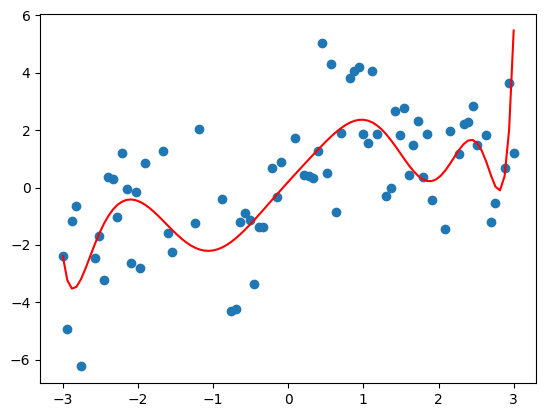

In [126]:
# YOUR CODE HERE

#Here we will try to attempt cross-validation on a grid-search
#by using a meshgrid of different tuple values of (D, lambda)

D_range = 16
lambda_range = 10

D_values = [i for i in range(1,D_range)]
lambda_values = [i for i in range(0,lambda_range)]
#lambda_values = np.linspace(0,5,50)

D_ij, lambda_ij = np.meshgrid(D_values, lambda_values)

original_shape = D_ij.shape

D_ij = D_ij.ravel()
lambda_ij = lambda_ij.ravel()
Cost = np.zeros(D_ij.shape)

#Here we iterate over 15x20 values of (D,lmbda) and compute the loss value while using cross-validation

rng = np.random.default_rng()
for i in range((D_range-1)*lambda_range):
    indexes = [i for i in range(len(X))]
    indexes_p = rng.permutation(indexes)
    
    X_perm = X[indexes_p]
    y_perm = y_noisy[indexes_p]
    
    i_75 = int(0.75*len(X))
    
    X_t = X_perm[:i_75]
    y_t = y_perm[:i_75]
    
    X_v = X_perm[i_75:]
    y_v = y_perm[i_75:]
    
    D_v = D_ij[i]
    Lmbda_v = lambda_ij[i]
    
    regularized_model = RegularizedPolynomialRegression(D=D_v, lmbda=Lmbda_v)
    regularized_model.fit(X_t, y_t)
    
    y_v_hat = regularized_model.predict(X_v)
    Cost[i] = np.linalg.norm(y_v-y_v_hat)
    

min_cost = np.min(Cost)
index_of_min = np.where(Cost == min_cost)[0][0]

D_optimal = D_ij[index_of_min]
Lambda_optimal = lambda_ij[index_of_min]

print("Cost* = " +str(min_cost))
print("D* = " +str(D_optimal))
print("Lambda* = " + str(Lambda_optimal))
         

D_ij = D_ij.reshape(original_shape)
lambda_ij = lambda_ij.reshape(original_shape)
Cost = Cost.reshape(original_shape)


#plt.contourf(D_ij, lambda_ij, Cost, 20, cmap='plasma')
#plt.colorbar()


regularized_model = RegularizedPolynomialRegression(D=D_optimal, lmbda=Lambda_optimal)
regularized_model.fit(X_train, y_train)

X0 = np.linspace(-3, 3, 100)

y_pred = regularized_model.predict(X0)


plt.plot(X_t, y_t, 'o')
plt.plot(X0, y_pred, c='red')
plt.show()



### 5. Comparison with `sklearn`

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

**(Question)** Use the `sklearn` classes imported above to apply polynomial regression on our toy dataset. Compare the results with your implementation and comment.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()